In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/Shopping_Revenue.csv")

In [ ]:
data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,2/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,3/9/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,2/2/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,5/9/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715


In [ ]:
data.columns


Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

In [ ]:
data.rename(columns = {'City Group':'City_Group'}, inplace = True)
data.rename(columns = {'Open Date':'Open_Date'}, inplace = True)

In [ ]:
data.City.unique()

array(['İstanbul', 'Ankara', 'Diyarbakır', 'Tokat', 'Gaziantep',
       'Afyonkarahisar', 'Edirne', 'Kocaeli', 'Bursa', 'İzmir', 'Sakarya',
       'Elazığ', 'Kayseri', 'Eskişehir', 'Şanlıurfa', 'Samsun', 'Adana',
       'Antalya', 'Kastamonu', 'Uşak', 'Muğla', 'Kırklareli', 'Konya',
       'Karabük', 'Tekirdağ', 'Denizli', 'Balıkesir', 'Aydın', 'Amasya',
       'Kütahya', 'Bolu', 'Trabzon', 'Isparta', 'Osmaniye'], dtype=object)

In [ ]:
data.isnull().sum()

data = data.dropna()

In [ ]:
data.City_Group.unique()

array(['Big Cities', 'Other'], dtype=object)

In [ ]:
data.Type.unique()

array(['IL', 'FC', 'DT'], dtype=object)

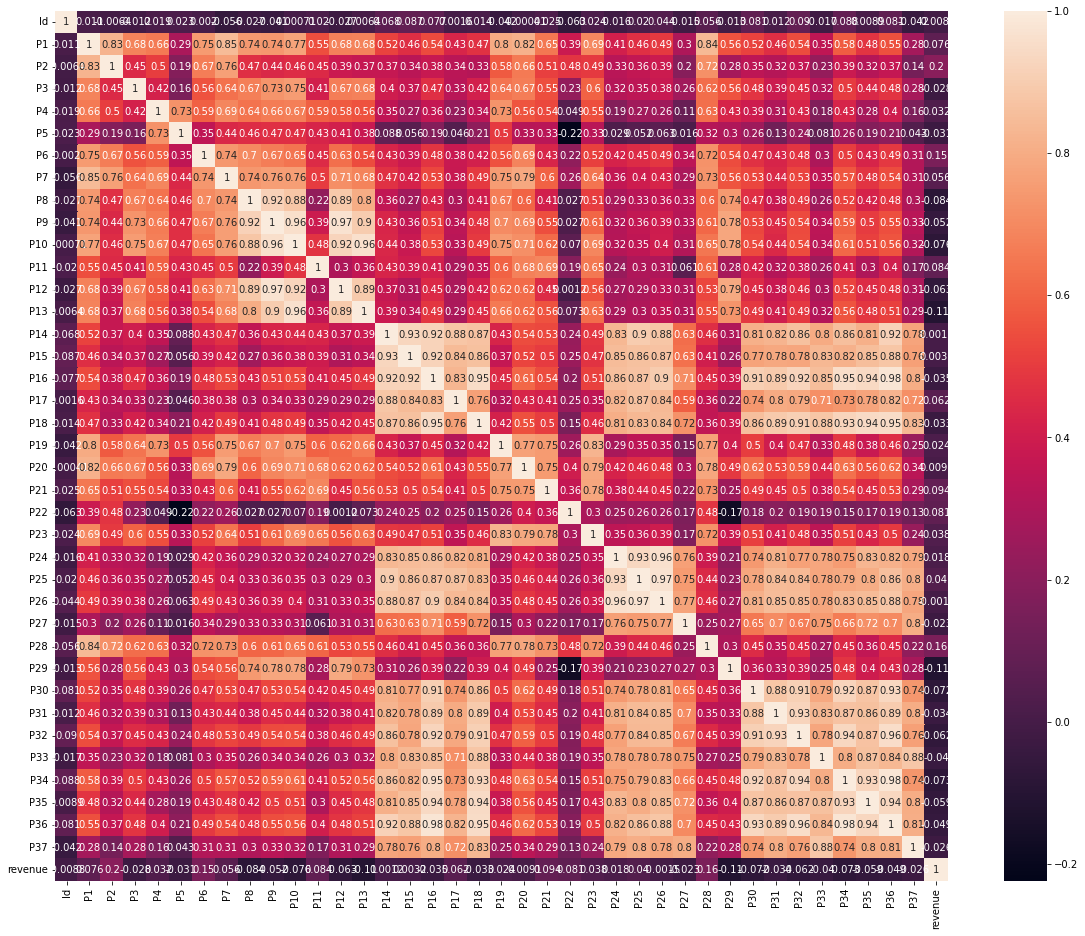

In [ ]:
#Checking correlation of numericaldata
plt.figure(figsize=(20,16))
sns.heatmap(data.corr(), annot = True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


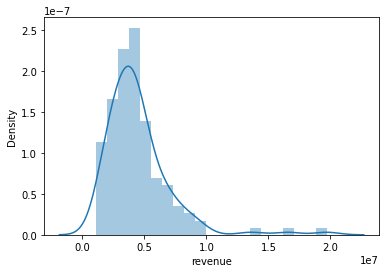

In [ ]:
sns.distplot(data['revenue'])
plt.show()
#Revenue has normal distribution

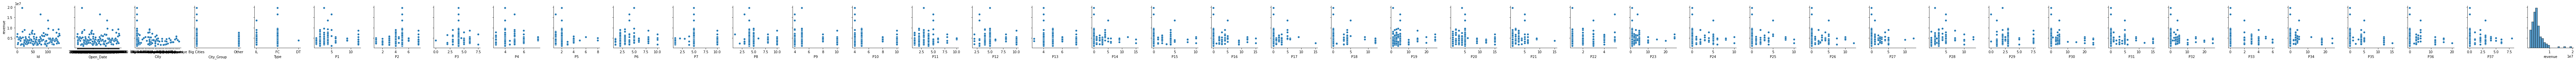

<Figure size 14400x11520 with 0 Axes>

In [ ]:
sns.pairplot(data, x_vars=data.columns, y_vars='revenue')
plt.figure(figsize=(200,160))
plt.show()

In [ ]:
# Encoding of categorical columns
data = pd.get_dummies(data, columns=['City','City_Group','Type'])


In [ ]:
data['Open_Date']= pd.to_datetime(data['Open_Date'])

In [ ]:
#extracting year of opening from date
data['Year'] = data['Open_Date'].dt.year
data.drop(columns=['Open_Date'], inplace = True)

In [ ]:
data.Year.dtype

dtype('int64')

In [ ]:
data.columns
data.isnull().sum()

Id                  0
P1                  0
P2                  0
P3                  0
P4                  0
                   ..
City_Group_Other    0
Type_DT             0
Type_FC             0
Type_IL             0
Year                0
Length: 76, dtype: int64

In [ ]:

data = data.dropna()

In [ ]:
np.any(np.isnan(data))

False

In [ ]:
np.all(np.isfinite(data))

True

In [ ]:
#defining features and targets
X = data.drop(columns=['revenue'])
y = data['revenue']

In [ ]:
#Checking colinearity
corr_matrix = X.corr()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than a threshold (e.g. 0.8)
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
X = X.drop(X[to_drop], axis = 1)


<ipython-input-27-dc55c8422b09>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [ ]:
# Scaling features using standard scaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
#Model building
linear_regression = LinearRegression()
decision_tree_regressor = DecisionTreeRegressor()
random_forest_regressor = RandomForestRegressor()
gradient_boosting_regressor = GradientBoostingRegressor()

In [ ]:
# Creating an instance of the KFold class
kf = KFold(n_splits=5)

In [ ]:
# Initialize a dictionary to store the mean squared errors of each model
mse_dict = {'Linear Regression': [], 'Decision Tree': [], 'Random Forest': [], 'Gradient Boosting': []}

In [ ]:
# Split the data into 5 folds and train/test the models
y = pd.DataFrame(y)
X = pd.DataFrame(X)
for train_index, test_index in kf.split(X):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train and predict using linear regression
    linear_regression.fit(X_train, y_train)
    y_pred_linear = linear_regression.predict(X_test)
    mse_linear = mean_squared_error(y_test, y_pred_linear)
    mse_dict['Linear Regression'].append(mse_linear)
    
    # Train and predict using decision tree
    decision_tree_regressor.fit(X_train, y_train)
    y_pred_decision_tree = decision_tree_regressor.predict(X_test)
    mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
    mse_dict['Decision Tree'].append(mse_decision_tree)
    
    # Train and predict using random forest
    random_forest_regressor.fit(X_train, y_train)
    y_pred_random_forest = random_forest_regressor.predict(X_test)
    mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
    mse_dict['Random Forest'].append(mse_random_forest)
    
    # Train and predict using gradient boosting
    gradient_boosting_regressor.fit(X_train, y_train)
    y_pred_gradient_boosting = gradient_boosting_regressor.predict(X_test)
    mse_gradient_boosting = mean_squared_error(y_test, y_pred_gradient_boosting)
    mse_dict['Gradient Boosting'].append(mse_gradient_boosting)

<ipython-input-32-437a72bbb09b>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_regressor.fit(X_train, y_train)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-32-437a72bbb09b>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_regressor.fit(X_train, y_train)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython

In [ ]:
# Calculate the mean of the mean squared errors for each model
mean_mse_dict = {model: np.mean(mse_dict[model]) for model in mse_dict.keys()}

# Find the model with the lowest mean squared error
best_model = min(mean_mse_dict, key=mean_mse_dict.get)
print('The best model is:', best_model)

The best model is: Random Forest
